In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import pickle
from sklearn.preprocessing import MultiLabelBinarizer

In [57]:
df2= pd.read_csv("data\steam.csv")
dic_genres = pd.read_csv("data\genre_to_id.csv", index_col='genre').to_dict(
    orient='dict')['id']

In [58]:
df2.head(2)

,genres,app_name,specs,price,early_access,id,sentiment,metascore,year,genre_id,spec_id
0,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,"['Single-player', 'Multi-player', 'Online Mult...",0.0,False,643980,Mostly Positive,0.0,2018,"[20, 3, 21, 10]","[17, 20, 24, 2, 27, 4, 9]"
1,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,"['Single-player', 'Multi-player', 'Online Mult...",0.0,False,670290,Mostly Positive,0.0,2017,"[17, 20, 3, 6, 11]","[17, 20, 24, 9, 14]"


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        21528 non-null  object 
 1   app_name      21528 non-null  object 
 2   specs         21528 non-null  object 
 3   price         21528 non-null  float64
 4   early_access  21528 non-null  bool   
 5   id            21528 non-null  int64  
 6   sentiment     21528 non-null  object 
 7   metascore     21528 non-null  float64
 8   year          21528 non-null  int64  
 9   genre_id      21528 non-null  object 
 10  spec_id       21528 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 1.7+ MB


#### Feature engineering

In [60]:
df2['genres'].head()

0         ['Free to Play', 'Indie', 'RPG', 'Strategy']
1    ['Casual', 'Free to Play', 'Indie', 'Simulatio...
2                ['Action', 'Adventure', 'Simulation']
3    ['Adventure', 'Casual', 'Indie', 'Simulation',...
4                     ['Action', 'Adventure', 'Indie']
Name: genres, dtype: object

In [5]:
#La columna categórica 'genres' tiene sus valores en forma de lista por eso debemos hacerle modificaciones hasta llegar a conseguir 
# convertirla en valores numéricos adecuados. 

# Convertir las cadenas de texto en listas de Python
df2['genres'] = df2['genres'].apply(ast.literal_eval)

# Obtener todos los géneros de todas las listas en la columna 'genres'
all_genres = [genre for genres_list in df2['genres'] for genre in genres_list]

# Obtener géneros únicos eliminando duplicados
unique_genres = list(set(all_genres))

print(unique_genres)

['Video Production', 'Early Access', 'Adventure', 'Software Training', 'Animation &amp; Modeling', 'Photo Editing', 'Racing', 'Simulation', 'Casual', 'Indie', 'Design &amp; Illustration', 'Action', 'Massively Multiplayer', 'RPG', 'Audio Production', 'Free to Play', 'Sports', 'Education', 'Strategy', 'Web Publishing', 'Utilities']


In [6]:
# Crear una instancia de MultiLabelBinarizer con la lista de todos los géneros únicos
mlb = MultiLabelBinarizer(classes=unique_genres)

# Aplicar fit_transform para obtener la matriz binaria de géneros en todo el DataFrame
genres_encoded = mlb.fit_transform(df2['genres'])

# Crear un DataFrame con los géneros codificados
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Concatenar el DataFrame con los géneros codificados con el DataFrame original 'df2'
df2 = pd.concat([df2, genres_df], axis=1)

# Eliminar la columna original 'genres' si ya no la necesitas
df2.drop('genres', axis=1, inplace=True)


In [7]:
#Eliminamos las columnas que no usaremos en nuestro modelo
df2.drop(columns= ["app_name", "id", "sentiment", "app_name", "spec_id", "specs", "genre_id"], axis= 1, inplace = True )

In [8]:
df2.metascore.value_counts()

metascore
0.0     19039
80.0      120
74.0      104
75.0      102
77.0      102
        ...  
24.0        1
95.0        1
34.0        1
20.0        1
30.0        1
Name: count, Length: 70, dtype: int64

In [9]:
# Eliminamos los valores igual a 0.0 de la variable "metascore".
df2 = df2.drop(df2[df2['metascore'] == 0.0].index)

In [10]:
df2.shape

(2489, 25)

In [11]:
df2.columns

Index(['price', 'early_access', 'metascore', 'year', 'Video Production',
       'Early Access', 'Adventure', 'Software Training',
       'Animation &amp; Modeling', 'Photo Editing', 'Racing', 'Simulation',
       'Casual', 'Indie', 'Design &amp; Illustration', 'Action',
       'Massively Multiplayer', 'RPG', 'Audio Production', 'Free to Play',
       'Sports', 'Education', 'Strategy', 'Web Publishing', 'Utilities'],
      dtype='object')

In [12]:
# La columna 'early_access' es booleana por lo que debemos convertirla a numérica. 
df2['early_access'] = df2['early_access'].astype(int)

In [13]:
# Mostramos las columnas resultantes y los tipos de datos cambiados
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2489 entries, 6 to 21522
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      2489 non-null   float64
 1   early_access               2489 non-null   int32  
 2   metascore                  2489 non-null   float64
 3   year                       2489 non-null   int64  
 4   Video Production           2489 non-null   int32  
 5   Early Access               2489 non-null   int32  
 6   Adventure                  2489 non-null   int32  
 7   Software Training          2489 non-null   int32  
 8   Animation &amp; Modeling   2489 non-null   int32  
 9   Photo Editing              2489 non-null   int32  
 10  Racing                     2489 non-null   int32  
 11  Simulation                 2489 non-null   int32  
 12  Casual                     2489 non-null   int32  
 13  Indie                      2489 non-null   int32  
 

In [14]:
df2.head()

,price,early_access,metascore,year,Video Production,Early Access,Adventure,Software Training,Animation &amp; Modeling,Photo Editing,...,Action,Massively Multiplayer,RPG,Audio Production,Free to Play,Sports,Education,Strategy,Web Publishing,Utilities
6,9.99,0,96.0,1998,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,6.99,0,84.0,2006,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,6.99,0,80.0,2006,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,9.99,0,76.0,2006,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
17,9.99,0,70.0,2005,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
df2.columns


Index(['price', 'early_access', 'metascore', 'year', 'Video Production',
       'Early Access', 'Adventure', 'Software Training',
       'Animation &amp; Modeling', 'Photo Editing', 'Racing', 'Simulation',
       'Casual', 'Indie', 'Design &amp; Illustration', 'Action',
       'Massively Multiplayer', 'RPG', 'Audio Production', 'Free to Play',
       'Sports', 'Education', 'Strategy', 'Web Publishing', 'Utilities'],
      dtype='object')

In [16]:
# Paso 1: Contar la cantidad de valores iguales a 0 en la columna 'price'.
count_zeros = (df2['price'] == 0).sum()

# Paso 2: Calcular el total de filas en la columna 'price'.
total_rows = df2['price'].count()

# Paso 3: Calcular el porcentaje de valores iguales a 0.
percentage_zeros = (count_zeros / total_rows) * 100

In [17]:
percentage_zeros

2.8927280032141423

In [18]:

# df2['price'].replace(0, pd.NA, inplace=True)


# df2.dropna(subset=['price'], inplace=True)

In [19]:
# df2.to_csv('data_model.csv', index=False)

#### Machine Learning

#### Árbol de decisión

In [22]:
#Separamos en x e y
X = df2.drop(columns= "price", axis = 1)
y = df2.price

In [23]:
#Importamos las librerías
from sklearn.model_selection import train_test_split

#30% para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=00000)

In [34]:
#Árbol de decisión
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#Creación de modelo
tree = DecisionTreeRegressor(max_depth = 10, max_features = None, min_samples_leaf = 2, min_samples_split = 2, splitter = "best", random_state=00000)
# tree = DecisionTreeRegressor(max_depth = 10, max_features = None, min_samples_leaf = 1, min_samples_split = 10, splitter = 'random', random_state=00000)


In [35]:
#Entrenamiento 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=0)

In [320]:
#Con Grid Search buscamos los mejores hiperparámetros para el modelo

param_grid = {
    # 'criterion': ['poisson', 'friedman_mse', 'absolute_error', 'squared_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],  # Puedes añadir más valores aquí.
    'min_samples_split': [2, 5, 10],  # Puedes añadir más valores aquí.
    'min_samples_leaf': [1, 2, 4],    # Puedes añadir más valores aquí.
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2],  # Puedes añadir más valores aquí.
    
}

In [321]:
#Instancio el modelo
rf = DecisionTreeRegressor()

# Le pasamos la grilla que creamos
model = GridSearchCV(rf, param_grid=param_grid, cv=5) 

# Entrenamos
model.fit(X_train, y_train)

c:\Users\USUARIO\Desktop\P1MLOps\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USUARIO\Desktop\P1MLOps\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USUARIO\Desktop\P1MLOps\venv\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\USUARIO\Desktop\P1MLOps\venv\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constrai

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [322]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Mejor Score: 0.34742177778163974



In [323]:
# Obtener el mejor puntaje (que podría ser negativo dependiendo del criterio de optimización).
best_score = model.best_score_

# Calcular el RMSE correspondiente (asumiendo que el modelo utiliza MSE como criterio de evaluación).
best_rmse = np.sqrt(-best_score)

# Obtener los mejores hiperparámetros.
best_hyperparameters = model.best_params_

# Imprimir los resultados.
print("Mejor RMSE: {:.4f}".format(best_rmse))
print("Mejores Hiperparámetros:")
for param, value in best_hyperparameters.items():
    print("{}: {}".format(param, value))

Mejor RMSE: nan
Mejores Hiperparámetros:
max_depth: 10
max_features: None
min_samples_leaf: 1
min_samples_split: 10
splitter: random


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4332\417080470.py:5: RuntimeWarning: invalid value encountered in sqrt
  best_rmse = np.sqrt(-best_score)


* Evalucación del modelo

In [36]:
#Calculo de las predicciones de Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [37]:
#Calculo de métricas
from sklearn.metrics import mean_squared_error

#Calculo RMSE en Train
rmse_train = mean_squared_error(y_train, y_train_pred)

#Calculo RMSE en Test
rmse_test = mean_squared_error(y_test, y_test_pred)

print(" El rmse en train es", rmse_train)
print(" El rmse en test es", rmse_test)

 El rmse en train es 39.976361374897685
 El rmse en test es 105.4658258764613


In [326]:
# # Obtén el predictor del modelo
# predictor = tree.predict

# # Guarda el predictor en un archivo
# with open('predictor.pkl', 'wb') as archivo:
#     pickle.dump(predictor, archivo)

In [327]:
# predictions = tree.predict(df2["erlyacces", "Accion", "nombres de generos", ])

# # sismos_predecir["fallecidos"] = predictions
# print(predictions)

<function matplotlib.pyplot.show(close=None, block=None)>

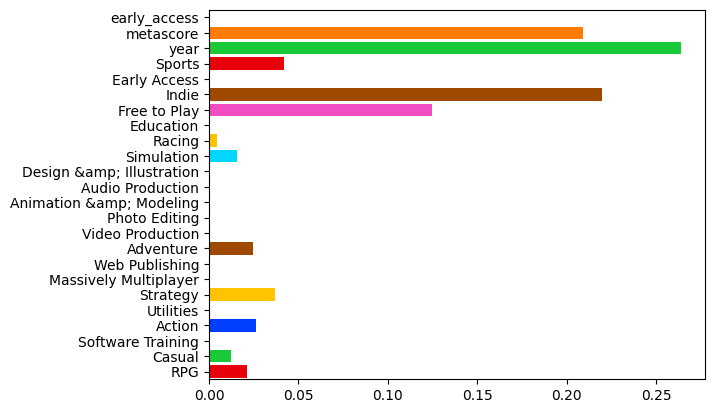

In [328]:
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x = importances, y = columns, palette="bright", saturation = 2.0)
plt.show

#### Random forest

In [44]:
#Separamos en x e y
X = df2.drop(columns= "price", axis = 1)
y = df2.price

In [45]:
#Importamos las librerías
from sklearn.model_selection import train_test_split

#30% para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=00000)

In [46]:
#Árbol de decisión
from sklearn.ensemble import RandomForestRegressor

#Creación de modelo
random_forest= RandomForestRegressor(max_depth = 10, max_features = None, min_samples_leaf = 1, min_samples_split = 5, random_state=00000)
# random_forest= RandomForestRegressor(criterion = "friedman_mse", max_depth = 10, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, random_state=00000)

In [47]:
#Entrenamiento 
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=None, min_samples_split=5,
                      random_state=0)

In [334]:
param_grid = {
    'criterion': ['poisson', 'friedman_mse', 'absolute_error', 'squared_error'],
    # 'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],  # Puedes añadir más valores aquí.
    'min_samples_split': [2, 5, 10],  # Puedes añadir más valores aquí.
    'min_samples_leaf': [1, 2, 4],    # Puedes añadir más valores aquí.
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    #'min_impurity_decrease': [0.0, 0.1, 0.2],  # Puedes añadir más valores aquí.
    
}

In [335]:
#Instancio el modelo
rf = RandomForestRegressor()

# Le pasamos la grilla que creamos
model = GridSearchCV(rf, param_grid=param_grid, cv=5) 

# Entrenamos
model.fit(X_train, y_train)

c:\Users\USUARIO\Desktop\P1MLOps\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USUARIO\Desktop\P1MLOps\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USUARIO\Desktop\P1MLOps\venv\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\USUARIO\Desktop\P1MLOps\venv\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constrai

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['poisson', 'friedman_mse',
                                       'absolute_error', 'squared_error'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [336]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor Score: 0.3909167939378974



In [48]:
#Calculo de las predicciones de Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

* Evaluación del modelo

In [49]:
#Calculo de métricas
from sklearn.metrics import mean_squared_error

#Calculo RMSE en Train
rmse_train = mean_squared_error(y_train, y_train_pred)

#Calculo RMSE en Test
rmse_test = mean_squared_error(y_test, y_test_pred)

print(" El rmse en train es", rmse_train)
print(" El rmse en test es", rmse_test)

 El rmse en train es 38.43326749879357
 El rmse en test es 67.42341173720833


In [83]:
random_forest.predict(X)

array([ 8.96860542,  9.42072114,  8.25369443, ...,  7.42431925,
       13.71079478, 10.27151074])

In [54]:
# Obtén el predictor del modelo
predictor = random_forest.predict(X_test)

# # Guarda el predictor en un archivo
with open('predictor.pkl', 'wb') as archivo:
    pickle.dump(predictor, archivo)

<function matplotlib.pyplot.show(close=None, block=None)>

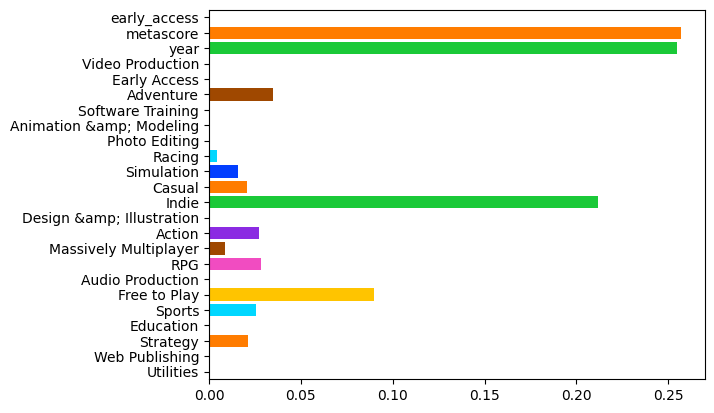

In [42]:
import seaborn as sns

importances = random_forest.feature_importances_
columns = X.columns
sns.barplot(x = importances, y = columns, palette="bright", saturation = 2.0)
plt.show